In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker

import warnings; warnings.filterwarnings('ignore')
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

## Reading in 1/4, 1/8, or 1/16 degree NW2 data:

In [2]:
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/
run=20; factor = (72/86400) #1/4 degree NeverWorld2setup, factor is for the e^2 diagnostic which has an error associated with it.
#run=26; factor = (192/86400) #1/8 degree NeverWorld2 setup, factor is for the e^2 diagnostic which has an error associated with it.
#run=28; factor = (540/86400) #1/16 degree NeverWorld2 setup,factor is for the e^2 diagnostic which has an error associated with it.
fs=xr.open_dataset('run%i/static.nc' % (run), decode_times=False)
os=xr.open_dataset('run%i/ocean.stats.nc' % (run), decode_times=False)
forcing=xr.open_dataset('run%i/forcing_00000500.nc' % (run), decode_times=False)
init=xr.open_dataset('run%i/MOM_IC.nc'% (run), decode_times=False)
tau = 500*86400
end_time = 30500
start_time = end_time - tau/86400

sn     = xr.open_dataset('run%i/snapshots_000%i.nc' % (run, end_time-500+5), decode_times=False) #snapshot
av     = xr.open_dataset('run%i/averages_000%i.nc' % (run, end_time-500+2), decode_times=False)  #5-day average
%ls
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
#print(fs)

/glade/p/univ/unyu0004/neerajab/NeverWorld2
A001_27_July_2020_coarsening.ipynb
A002_02_August_2020_numerical_schemes.ipynb
A003_24_August_2020_momentum_energy_budget.ipynb
A004_09_September_2020_comparison_to_obs.ipynb
A005_10_September_2020_compare_runs.ipynb
A006_15_September_2020_GM.ipynb
A007_05_October_2020_pow2.ipynb
A008_10_October_2020.ipynb
A009_tests.ipynb
A010_spectra.ipynb
A011_07_January_2021_tracers.ipynb
A012_07_January_2021_tracer_video.ipynb
coarsen.py
compute_spectra.py
__pycache__/
run20@
run26@
run28@
run33@
runGM/
tests.ipynb
tracer/
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


## For reading in the 1/32 degree NW2 data:

In [3]:
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/
run=33; factor = 1440/86400 #1/32 degree NeverWorld setup
fs=xr.open_dataset('run%i/static.nc' % (run), decode_times=False)
os=xr.open_dataset('run%i/ocean.stats.nc' % (run), decode_times=False)
forcing=xr.open_dataset('run%i/forcing_00002000.nc' % (run), decode_times=False)
init=xr.open_dataset('run33/MOM_IC.nc', decode_times=False)
av=xr.open_mfdataset(['run33/averages_00001502.nc','run33/averages_00001602.nc', 'run33/averages_00001702.nc', 'run33/averages_00001802.nc', 'run33/averages_00001902.nc'],decode_times=False,combine='by_coords')
# print(av)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/neerajab/NeverWorld2
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


### Looking at two 1/2 degree tests for the Coriolis discretization.

In [99]:
#with simple coriolis improvement:
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.5deg_N15_AH90_begw01_KHTH500/ 
# forcing=xr.open_dataset('forcing_00032500.nc', decode_times=False)
# fs=xr.open_dataset('static.nc', decode_times=False)
# os=xr.open_dataset('ocean.stats.nc', decode_times=False)
# av     = xr.open_dataset('averages_00032002.nc', decode_times=False)  #5-day average
# %cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

##original without simple coriolis: also uses KHTH=500
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run3/ 
forcing=xr.open_dataset('forcing_00030500.nc', decode_times=False)
fs=xr.open_dataset('static.nc', decode_times=False)
os=xr.open_dataset('ocean.stats.nc', decode_times=False)
av     = xr.open_dataset('averages_00031502.nc', decode_times=False)  #5-day average
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

# ##original without simple coriolis: also uses KHTH=100
# %cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run3/ 
# forcing=xr.open_dataset('forcing_00030500.nc', decode_times=False)
# fs=xr.open_dataset('static.nc', decode_times=False)
# os=xr.open_dataset('ocean.stats.nc', decode_times=False)
# av     = xr.open_dataset('averages_00031502.nc', decode_times=False)  #5-day average
# %cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run3
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [13]:
#simple coriolis and also BEGW parameter is 0.1 (related to gravity wave time stepping weight)
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_AH90_begw01
forcing=xr.open_dataset('forcing_00033000.nc', decode_times=False)
fs=xr.open_dataset('static.nc', decode_times=False)
os=xr.open_dataset('ocean.stats.nc', decode_times=False)
av     = xr.open_dataset('averages_00032502.nc', decode_times=False)  #5-day average
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

#simple coriolis and also BEGW parameter is 0.1 (related to gravity wave time stepping weight) 
## WE ARE NOT USING SMAGORINSKY VISCOSITY HERE, ONLY BIHARMONIC
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_AH90_begw01_const_AH/
# forcing=xr.open_dataset('forcing_00033000.nc', decode_times=False)
# fs=xr.open_dataset('static.nc', decode_times=False)
# os=xr.open_dataset('ocean.stats.nc', decode_times=False)
# av     = xr.open_dataset('averages_00032502.nc', decode_times=False)  #5-day average
# %cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

# #simple coriolis and also BEGW parameter is 0.1 (related to gravity wave time stepping weight) 
# ## WE ARE NOT USING SMAGORINSKY VISCOSITY HERE, ONLY LAPLACIAN
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_AH90_begw01_laplacian
# forcing=xr.open_dataset('forcing_00033000.nc', decode_times=False)
# fs=xr.open_dataset('static.nc', decode_times=False)
# os=xr.open_dataset('ocean.stats.nc', decode_times=False)
# av     = xr.open_dataset('averages_00032502.nc', decode_times=False)  #5-day average
# %cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

# SADOURNY with simple coriolis and also BEGW parameter is 0.1 (related to gravity wave time stepping weight)
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_S75_ENE_begw01
# %ls
# forcing=xr.open_dataset('forcing_00033000.nc', decode_times=False)
# fs=xr.open_dataset('static.nc', decode_times=False)
# os=xr.open_dataset('ocean.stats.nc', decode_times=False)
# av     = xr.open_dataset('averages_00032502.nc', decode_times=False)  #5-day average
# %cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

print(fs)

/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_AH90_begw01
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis
<xarray.Dataset>
Dimensions:      (time: 1, xh: 240, xq: 241, yh: 560, yq: 561)
Coordinates:
  * xh           (xh) float64 0.125 0.375 0.625 0.875 ... 59.38 59.62 59.88
  * yh           (yh) float64 -69.88 -69.62 -69.38 -69.12 ... 69.38 69.62 69.88
  * time         (time) float64 0.0
  * xq           (xq) float64 0.0 0.25 0.5 0.75 1.0 ... 59.25 59.5 59.75 60.0
  * yq           (yq) float64 -70.0 -69.75 -69.5 -69.25 ... 69.5 69.75 70.0
Data variables:
    geolon       (yh, xh) float64 ...
    geolat       (yh, xh) float64 ...
    geolon_c     (yq, xq) float32 ...
    geolat_c     (yq, xq) float32 ...
    geolon_u     (yh, xq) float32 ...
    geolat_u     (yh, xq) float32 ...
    geolon_v     (yq, xh) float32 ...
    geolat_v     (yq, xh) float32 ...
    area_t       (yh, xh) float64 ...
    area_u       (yh, xq) float64 ...
    area_v       (yq, xh) float64 ...
 

### Looking at several 1/16 degree test cases (simple Coriolis, then simple Coriolis with BEGW=0.1, then a case with a different energetics scheme (Sadourny instead of AH90)). 

In [3]:
# %cd /glade/p/univ/unyu0004/adcroft/NeverWorld2/nw2_0.0625deg_N15_simpleCoriolis/
# fs=xr.open_dataset('static.nc', decode_times=False)
# os=xr.open_dataset('ocean.stats.nc', decode_times=False)
# forcing=xr.open_dataset('forcing_00033000.nc', decode_times=False)
# av   = xr.open_dataset('averages_00032502.nc', decode_times=False)  #5-day average
# %cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

%cd /glade/p/univ/unyu0004/adcroft/NeverWorld2/nw2_0.0625deg_N15_AH90_begw01
fs=xr.open_dataset('static.nc', decode_times=False)
os=xr.open_dataset('ocean.stats.nc', decode_times=False)
forcing=xr.open_dataset('forcing_00033000.nc', decode_times=False)
av   = xr.open_dataset('averages_00032502.nc', decode_times=False)  #5-day average
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

# %cd /glade/p/univ/unyu0004/adcroft/NeverWorld2/nw2_0.0625deg_N15_SadournyEnergy
# fs=xr.open_dataset('static.nc', decode_times=False)
# os=xr.open_dataset('ocean.stats.nc', decode_times=False)
# forcing=xr.open_dataset('forcing_00033000.nc', decode_times=False)
# av   = xr.open_dataset('averages_00032502.nc', decode_times=False)  #5-day average
# %cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/adcroft/NeverWorld2/nw2_0.0625deg_N15_AH90_begw01
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [4]:
#Read in various grid variables from the static file and forcing:
lon=fs['geolon']; lat=fs['geolat']
depth = np.array(fs['depth_ocean'])
#depthmat = np.tile(depth,[15,1,1])
area_t=np.array(fs['area_t'])

xh = fs.xh.values
yh = fs.yh.values
dxh = fs.dxCu.values; dxh = dxh[:,1:] #(dxh[1:,:]+dxh[:-1,:])/2.
dyh = fs.dyCv.values; dyh = dyh[1:,:] #dyh = (dyh[:,1:]+dyh[:,:-1])/2.

Layer = np.array(os['Layer']);
drho=np.zeros(15);
drho[0]=Layer[0]; drho[1:]=np.diff(Layer)
print(drho); #drho contains the density differences across each interface. 15 entries, includes surface but not bottom.
#drhomat=np.transpose(np.tile(drho,[len(yh),len(xh),1]),[2,0,1])

[1.0226e+03 2.1000e-01 3.9000e-01 5.4000e-01 5.8000e-01 5.8000e-01
 5.7000e-01 5.3000e-01 4.8000e-01 4.2000e-01 3.7000e-01 3.1000e-01
 2.4000e-01 1.7000e-01 1.1000e-01]


In [5]:
print(av)

<xarray.Dataset>
Dimensions:     (nv: 2, time: 100, xh: 1920, xq: 1921, yh: 4480, yq: 4481, zi: 16, zl: 15)
Coordinates:
  * xq          (xq) float64 0.0 0.03125 0.0625 0.09375 ... 59.94 59.97 60.0
  * yh          (yh) float64 -69.98 -69.95 -69.92 -69.89 ... 69.92 69.95 69.98
  * zl          (zl) float64 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time        (time) float64 1.502e+03 1.508e+03 ... 1.992e+03 1.998e+03
  * nv          (nv) float64 1.0 2.0
  * xh          (xh) float64 0.01562 0.04688 0.07812 ... 59.92 59.95 59.98
  * yq          (yq) float64 -70.0 -69.97 -69.94 -69.91 ... 69.94 69.97 70.0
  * zi          (zi) float64 1.022e+03 1.023e+03 ... 1.028e+03 1.028e+03
Data variables:
    u           (time, zl, yh, xq) float32 dask.array<chunksize=(20, 15, 4480, 1921), meta=np.ndarray>
    v           (time, zl, yq, xh) float32 dask.array<chunksize=(20, 15, 4481, 1920), meta=np.ndarray>
    h           (time, zl, yh, xh) float32 dask.array<chunksize=(20, 15, 4480, 1920), meta=

## Reading in KE budget terms

In [9]:
# KEterm1 = av['dKE_dt'].sum(axis=1)
# #assuming all of these are on the RHS of the KE equation
# KEterm2 = av['KE_CorAdv'].sum(axis=1)
# KEterm2_alternate = av['KE_adv'].sum(axis=1)
# KEterm3 = av['PE_to_KE'].sum(axis=1)
# KEterm4 = av['KE_BT'].sum(axis=1)
# KEterm5 = av['KE_visc'].sum(axis=1)
# KEterm6 = av['KE_horvisc'].sum(axis=1)


# KEterm1 = (KEterm1).mean(axis=0);
# KEterm2 = (KEterm2).mean(axis=0);
# KEterm2_alternate = (KEterm2_alternate).mean(axis=0);
# KEterm3 = (KEterm3).mean(axis=0);
# KEterm4 = (KEterm4).mean(axis=0);
# KEterm5 = (KEterm5).mean(axis=0);
# KEterm6 = (KEterm6).mean(axis=0);

# E = KEterm1-KEterm2-KEterm3-KEterm4-KEterm5-KEterm6 #residual term between dKE/dt and RHS of equation
#E_alternate = KEterm1-KEterm2_alternate-KEterm3-KEterm4-KEterm5-KEterm6

#For entire water column:

#0.25 degree: 
#ACC West is lon:20:80,   lat: 20:140
#ACC East is lon:160:220, lat: 20:140
#North    is lon:20:220,  lat: 160:540
lon1 = 1280; lon2=1760;
lat1 = 160; lat2=1120;

KEterm1 = (av['dKE_dt'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
#assuming all of these are on the RHS of the KE equation
KEterm2 = (av['KE_CorAdv'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm2_alternate = (av['KE_adv'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm3 = (av['PE_to_KE'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm4 = (av['KE_BT'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm5 = (av['KE_visc'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm6 = (av['KE_horvisc'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)


KEterm1 = (KEterm1).mean(axis=0);
KEterm2 = (KEterm2).mean(axis=0);
KEterm2_alternate = (KEterm2_alternate).mean(axis=0);
KEterm3 = (KEterm3).mean(axis=0);
KEterm4 = (KEterm4).mean(axis=0);
KEterm5 = (KEterm5).mean(axis=0);
KEterm6 = (KEterm6).mean(axis=0);

E = KEterm1-KEterm2-KEterm3-KEterm4-KEterm5-KEterm6 #residual term between dKE/dt and RHS of equation
E_alternate = KEterm1-KEterm2_alternate-KEterm3-KEterm4-KEterm5-KEterm6
print(KEterm1.shape,E.shape)


(960, 480) (960, 480)


In [10]:
KEterm6.mean

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'KE_horvisc' (yh: 960, xh: 480)>
dask.array<mean_agg-aggregate, shape=(960, 480), dtype=float32, chunksize=(960, 480), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 -64.98 -64.95 -64.92 -64.89 ... -35.08 -35.05 -35.02
  * xh       (xh) float64 40.02 40.05 40.08 40.11 ... 54.89 54.92 54.95 54.98>

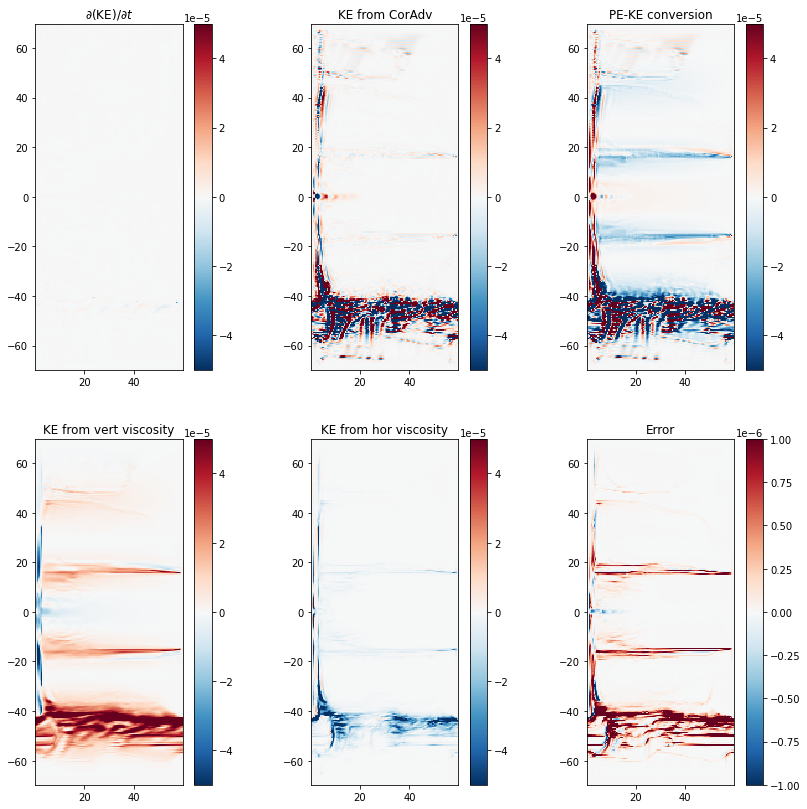

In [104]:
plt.figure(figsize=(14,14))


cmin=-.5e-4; cmax=.5e-4;
plt.subplot(2,3,1)
plt.pcolormesh(xh,yh,KEterm1,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\partial ($KE$)/\partial t$')
plt.colorbar()

plt.subplot(2,3,2)
plt.pcolormesh(xh,yh,KEterm2,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE from CorAdv')
plt.colorbar()

plt.subplot(2,3,3)
plt.pcolormesh(xh,yh,(KEterm3+KEterm4),norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'PE-KE conversion')
plt.colorbar()


plt.subplot(2,3,4)
plt.pcolormesh(xh,yh,KEterm5,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE from vert viscosity')
plt.colorbar()

plt.subplot(2,3,5)
plt.pcolormesh(xh,yh,KEterm6,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE from hor viscosity')
plt.colorbar()

plt.subplot(2,3,6)
plt.pcolormesh(xh,yh,E,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-1e-6,vmax=1e-6)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'Error')

plt.colorbar()

TypeError: Dimensions of C (380, 200) are incompatible with X (240) and/or Y (560); see help(pcolormesh)

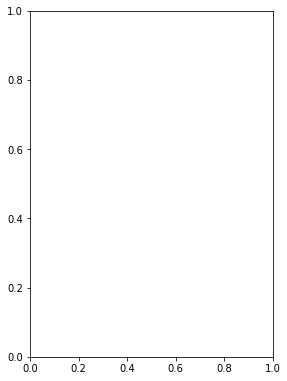

In [18]:
plt.figure(figsize=(20,14))

plt.subplot(2,4,1)
plt.pcolormesh(xh,yh,KEterm2,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-1e-5,vmax=1e-5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE_CorAdv')
plt.colorbar()

plt.subplot(2,4,2)
plt.pcolormesh(xh,yh,KEterm2_alternate,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-1e-5,vmax=1e-5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE_adv')
plt.colorbar()

plt.subplot(2,4,3)
plt.pcolormesh(xh,yh,KEterm2-KEterm2_alternate,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-1e-5,vmax=1e-5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE_Cor')
plt.colorbar()

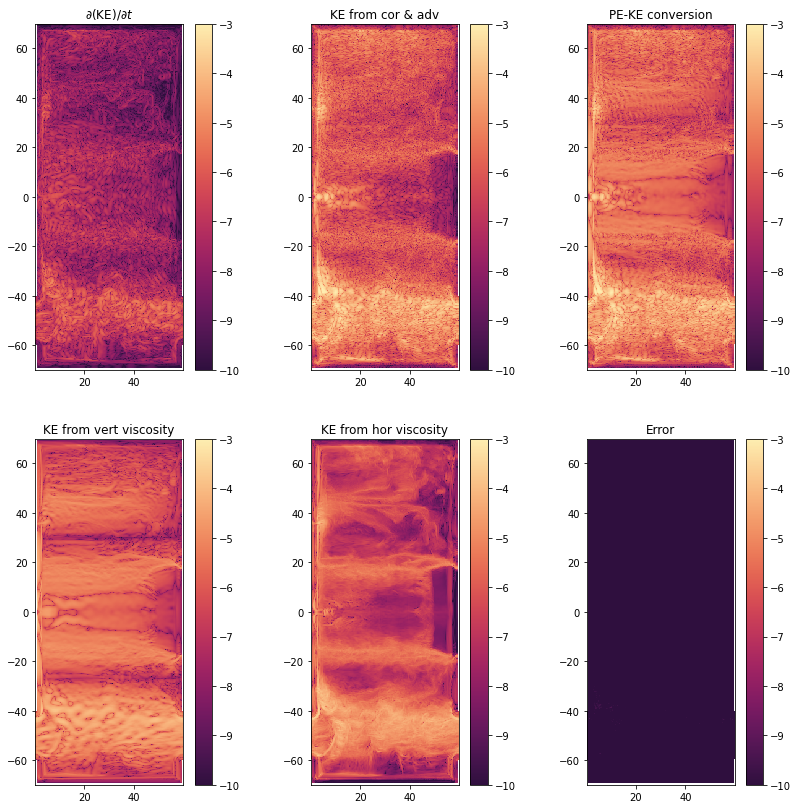

In [9]:
plt.figure(figsize=(14,14))

cmin=-10; cmax=-3;

plt.subplot(2,3,1)
plt.pcolormesh(xh,yh,np.log10(abs(KEterm1)),cmap=cmocean.cm.matter_r,vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\partial ($KE$)/\partial t$')
plt.colorbar()

plt.subplot(2,3,2)
plt.pcolormesh(xh,yh,np.log10(abs(KEterm2)),cmap=cmocean.cm.matter_r,vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE from cor & adv')
plt.colorbar()

plt.subplot(2,3,3)
plt.pcolormesh(xh,yh,np.log10(abs(KEterm3+KEterm4)),cmap=cmocean.cm.matter_r,vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'PE-KE conversion')
plt.colorbar()


plt.subplot(2,3,4)
plt.pcolormesh(xh,yh,np.log10(abs(KEterm5)),cmap=cmocean.cm.matter_r,vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE from vert viscosity')
plt.colorbar()

plt.subplot(2,3,5)
plt.pcolormesh(xh,yh,np.log10(abs(KEterm6)),cmap=cmocean.cm.matter_r,vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'KE from hor viscosity')
plt.colorbar()

plt.subplot(2,3,6)
plt.pcolormesh(xh,yh,np.log10(abs(E)),cmap=cmocean.cm.matter_r,vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'Error')

plt.colorbar()

## Computing Time-Averaged PE to KE Conversion Term Independently of Diagnostics

In [22]:
# h  = np.array(av['h'][:,:,:,:]); h[np.isnan(h)]=0.0
# u  = np.array(av['u'][:,:,:,:]); h[np.isnan(h)]=0.0
# v  = np.array(av['v'][:,:,:,:]); h[np.isnan(h)]=0.0

# interface = np.zeros(h.shape);
# for i in range(0,len(Layer)):
#     print(i)
#     interface[:,i,:,:]=np.nansum(h[:,i:,:,:],axis=1)-depth #negative down
# #interface is negative down

# e_calculated  = interface

# print('done')


In [23]:
dxh.shape

(560, 240)

In [12]:
# #The conversion term from the PE equation with the gradient inside of the summation:

# conversion_term_PE = np.zeros(e_calculated[:,:,:-1,:-1].shape)
# term1 = np.zeros(e_calculated[:,:,:-1,:-1].shape); 
# term2 = np.zeros(e_calculated[:,:,:-1,:-1].shape);

# dedx = np.diff(e_calculated[:,:,:,:],axis=3)/dxh[:,:-1]
# dedy = np.diff(e_calculated[:,:,:,:],axis=2)/dyh[:-1,:]

# for i in range(0,len(Layer)): #len(Layer) is 15, i = 0:14
#     print(i)
#     term1[:,i,:,:] = 10.*drho[i]*dedx[:,i,:-1,:]/1022.6 
#     term2[:,i,:,:] = 10.*drho[i]*dedy[:,i,:,:-1]/1022.6

# for i in range(0,len(Layer)):
#     conversion_term_PE[:,i,:,:] = term1[:,i,:,:]*np.nansum(h[:,i:,:-1,:-1]*u[:,i:,:-1,:-2],axis=1)+term2[:,i,:,:]*np.nansum(h[:,i:,:-1,:-1]*v[:,i:,:-2,:-1],axis=1)  #units m3/s3


# conversion_term_PE_int=np.nansum(conversion_term_PE,axis=1)
# conversion_term_PE_TA= np.nanmean(conversion_term_PE_int,axis=0)
# conversion_term_inst=conversion_term_PE_int[-1,:,:]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [13]:
# #The conversion term from the KE equation 

# conversion_term_KE = np.zeros(e_calculated[:,:,:-1,:-1].shape)
# term1 = np.zeros(e_calculated[:,:,:-1,:-1].shape); 
# term2 = np.zeros(e_calculated[:,:,:-1,:-1].shape);

# dedx = np.diff(e_calculated[:,:,:,:],axis=3)/dxh[:,:-1]
# dedy = np.diff(e_calculated[:,:,:,:],axis=2)/dyh[:-1,:]

# for i in range(0,len(Layer)): #len(Layer) is 15, i = 0:14
#     print(i)
#     term1[:,i,:,:] = 10.*drho[i]*dedx[:,i,:-1,:]/1022.6 
#     term2[:,i,:,:] = 10.*drho[i]*dedy[:,i,:,:-1]/1022.6


# for i in range(0,len(Layer)):    
#     conversion_term_KE[:,i,:,:] = -h[:,i,:-1,:-1]*u[:,i,:-1,:-2]*np.nansum(term1[:,0:i+1,:,:],axis=1)-h[:,i,:-1,:-1]*v[:,i,:-2,:-1]*np.nansum(term2[:,0:i+1,:,:],axis=1)  #units m3/s3

# conversion_term_KE_int=np.nansum(conversion_term_KE,axis=1)
# conversion_term_KE_TA=np.nanmean(conversion_term_KE_int,axis=0)
# print(conversion_term_KE_TA.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(559, 239)


Text(0.5, 1.0, 'Outside ACC')

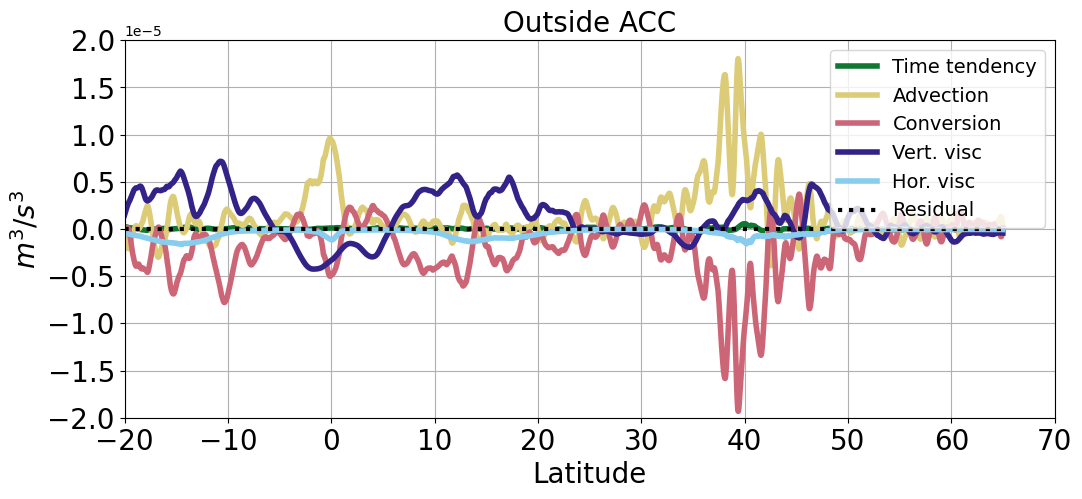

In [54]:
plt.figure(figsize=(12, 5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh[lat1:lat2],KEterm1,'-',c='#117733',linewidth=4)
plt.plot(yh[lat1:lat2],KEterm2.mean(axis=1),'-',c='#ddcc77',linewidth=4)
plt.plot(yh[lat1:lat2],(KEterm3+KEterm4).mean(axis=1),'-',c='#cc6677',linewidth=4)
plt.plot(yh[lat1:lat2],KEterm5.mean(axis=1),'-',c='#332288',linewidth=4)
plt.plot(yh[lat1:lat2],KEterm6.mean(axis=1),'-',c='#88ccee',linewidth=4)
plt.plot(yh[lat1:lat2],E.mean(axis=1),':',c='k',linewidth=3)




plt.grid()
plt.legend(['Time tendency','Advection','Conversion','Vert. visc','Hor. visc','Residual'],loc='upper right',fontsize=14)
#plt.plot([0, 0],[-100, 100],'--',color=[0,0,0])
plt.xlim(-20,70); plt.xticks(fontsize=20); 
plt.ylim(-2e-5,2e-5); 
plt.yticks(fontsize=20)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('Latitude',fontsize=20)
plt.ylabel('$m^3/s^3$',fontsize=20)
plt.title('Outside ACC',fontsize=20)

Text(0.5, 1.0, 'Eastern ACC')

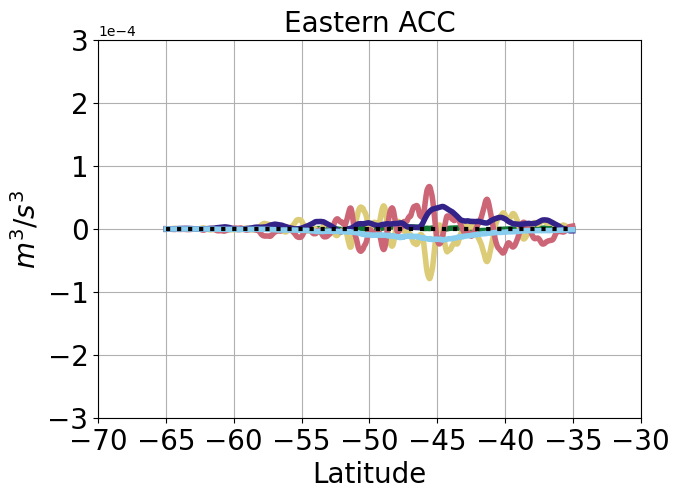

In [11]:
plt.figure(figsize=(7, 5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh[lat1:lat2],KEterm1.mean(axis=1),'-',c='#117733',linewidth=4)
plt.plot(yh[lat1:lat2],KEterm2.mean(axis=1),'-',c='#ddcc77',linewidth=4)
plt.plot(yh[lat1:lat2],(KEterm3+KEterm4).mean(axis=1),'-',c='#cc6677',linewidth=4)
plt.plot(yh[lat1:lat2],(KEterm5).mean(axis=1),'-',c='#332288',linewidth=4)
plt.plot(yh[lat1:lat2],(KEterm6).mean(axis=1),'-',c='#88ccee',linewidth=4)
plt.plot(yh[lat1:lat2],E.mean(axis=1),':',c='k',linewidth=3)


plt.grid()
#plt.legend(['Time tendency','Advection','Conversion','Vert. visc','Hor. visc','Residual'],loc='upper right',fontsize=14)
#plt.plot([0, 0],[-100, 100],'--',color=[0,0,0])
plt.xlim(-70,-30); plt.xticks(fontsize=20); 
plt.ylim(-3e-4,3e-4); 
plt.yticks(fontsize=20)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('Latitude',fontsize=20)
plt.ylabel('$m^3/s^3$',fontsize=20)
plt.title('Eastern ACC',fontsize=20)

In [24]:
lat2

540

ValueError: x and y must have same first dimension, but have shapes (560,) and (480,)

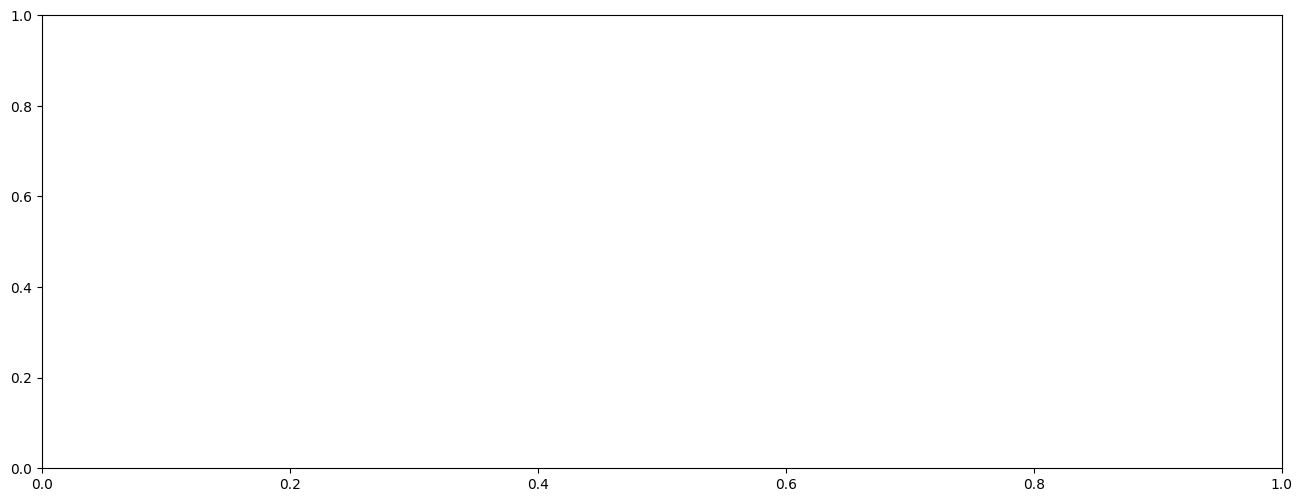

In [12]:
plt.figure(figsize=(16, 6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh,np.nanmean(KEterm1,axis=1),'-',c='#117733',linewidth=4)
plt.plot(yh,np.nanmean(KEterm2,axis=1),'-',c='#ddcc77',linewidth=4)
plt.plot(yh,np.nanmean(KEterm3+KEterm4,axis=1),'-',c='#cc6677',linewidth=4)
plt.plot(yh,np.nanmean(KEterm5,axis=1),'-',c='#332288',linewidth=4)
plt.plot(yh,np.nanmean(KEterm6,axis=1),'-',c='#88ccee',linewidth=4)
plt.plot(yh,np.nanmean(E,axis=1),':',c='k',linewidth=3)




plt.grid()
#plt.legend(['Time tendency','Advection','Conversion','Vert. visc','Hor. visc','Residual'],loc='upper right',fontsize=14)
plt.plot([0, 0],[-100, 100],'--',color=[0,0,0])
plt.xlim(-20, 70); plt.xticks(fontsize=16); 
plt.ylim(-1e-5,1e-5); plt.yticks(fontsize=16)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('$m^3/s^3$',fontsize=16)
#plt.title('1/4$^\circ$ KE budget terms',fontsize=20)

Text(0.5, 1.0, '1/2$^\\circ$ KE Budget Terms')

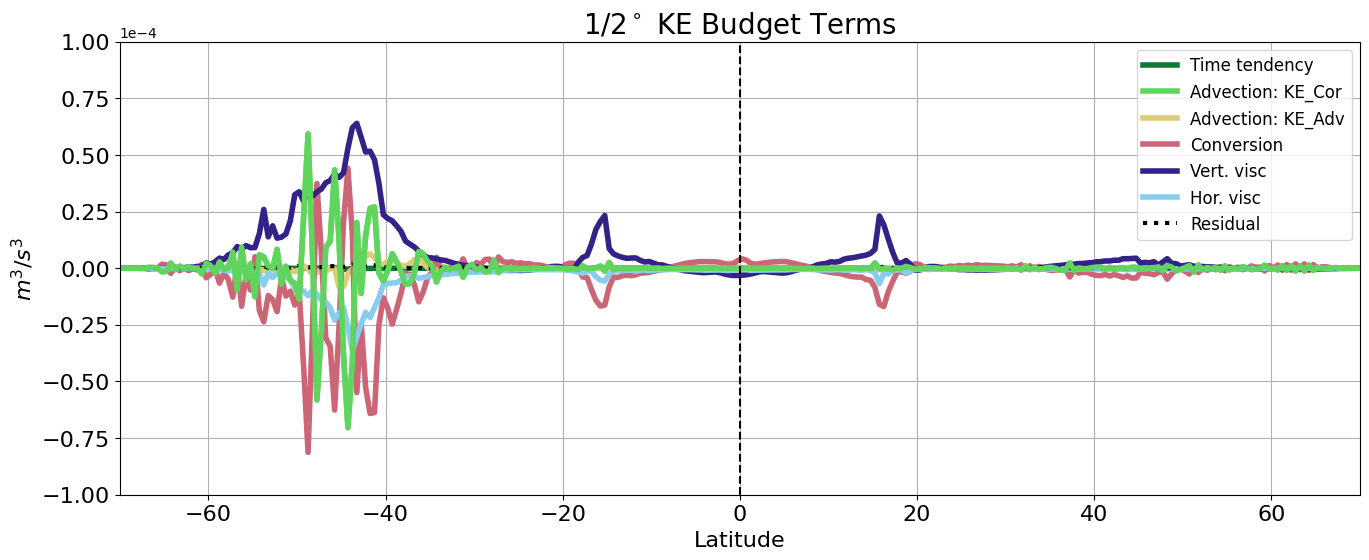

In [106]:
plt.figure(figsize=(16, 6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh,np.nanmean(KEterm1,axis=1),'-',c='#117733',linewidth=4)
plt.plot(yh,np.nanmean(KEterm2-KEterm2_alternate,axis=1),'-',c='#60D55D',linewidth=4)
plt.plot(yh,np.nanmean(KEterm2_alternate,axis=1),'-',c='#ddcc77',linewidth=4)
plt.plot(yh,np.nanmean(KEterm3+KEterm4,axis=1),'-',c='#cc6677',linewidth=4)
plt.plot(yh,np.nanmean(KEterm5,axis=1),'-',c='#332288',linewidth=4)
plt.plot(yh,np.nanmean(KEterm6,axis=1),'-',c='#88ccee',linewidth=4)
plt.plot(yh,np.nanmean(E,axis=1),':',c='k',linewidth=3)

plt.plot(yh,np.nanmean(KEterm2-KEterm2_alternate,axis=1),'-',c='#60D55D',linewidth=4)




plt.grid()
plt.legend(['Time tendency','Advection: KE_Cor','Advection: KE_Adv','Conversion','Vert. visc','Hor. visc','Residual'],loc='upper right',fontsize=12)
plt.plot([0, 0],[-100, 100],'--',color=[0,0,0])
plt.xlim(-70, 70); plt.xticks(fontsize=16); 
plt.ylim(-10e-5,10e-5); plt.yticks(fontsize=16)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('$m^3/s^3$',fontsize=16)
plt.title('1/2$^\circ$ KE Budget Terms',fontsize=20)

Text(0.5, 1.0, '1/2$^\\circ$ KE Budget Terms')

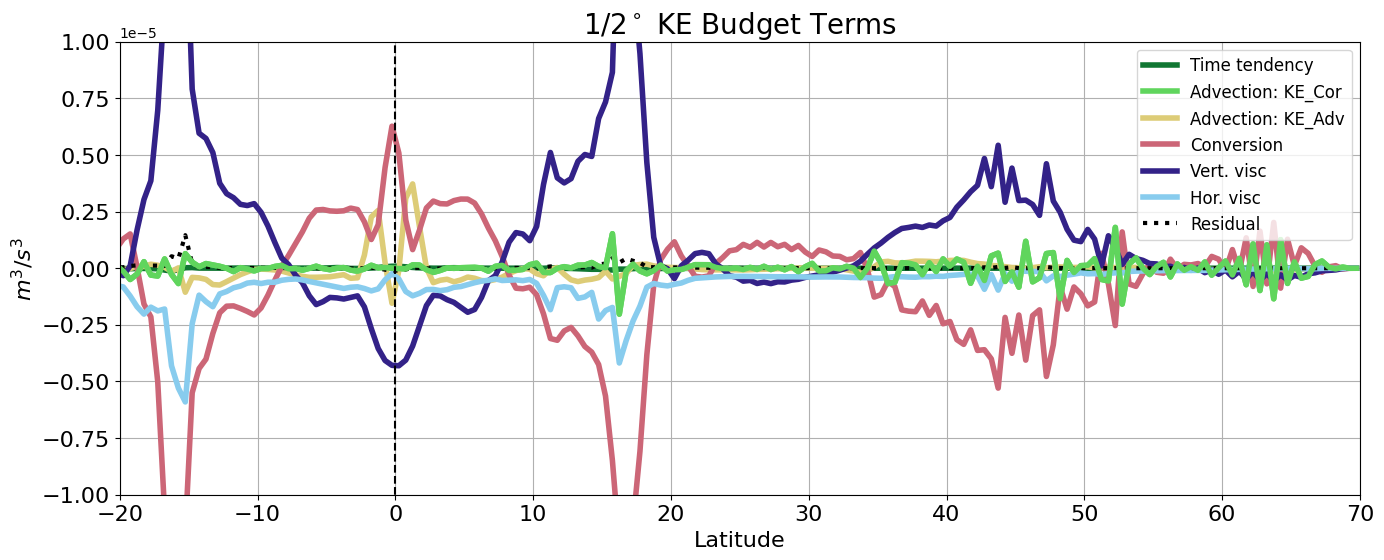

In [63]:
plt.figure(figsize=(16, 6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh,np.nanmean(KEterm1,axis=1),'-',c='#117733',linewidth=4)
plt.plot(yh,np.nanmean(KEterm2-KEterm2_alternate,axis=1),'-',c='#60D55D',linewidth=4)
plt.plot(yh,np.nanmean(KEterm2_alternate,axis=1),'-',c='#ddcc77',linewidth=4)
plt.plot(yh,np.nanmean(KEterm3+KEterm4,axis=1),'-',c='#cc6677',linewidth=4)
plt.plot(yh,np.nanmean(KEterm5,axis=1),'-',c='#332288',linewidth=4)
plt.plot(yh,np.nanmean(KEterm6,axis=1),'-',c='#88ccee',linewidth=4)
plt.plot(yh,np.nanmean(E,axis=1),':',c='k',linewidth=3)

plt.plot(yh,np.nanmean(KEterm2-KEterm2_alternate,axis=1),'-',c='#60D55D',linewidth=4)




plt.grid()
plt.legend(['Time tendency','Advection: KE_Cor','Advection: KE_Adv','Conversion','Vert. visc','Hor. visc','Residual'],loc='upper right',fontsize=12)
plt.plot([0, 0],[-100, 100],'--',color=[0,0,0])
plt.xlim(-20, 70); plt.xticks(fontsize=16); 
plt.ylim(-1e-5,1e-5); plt.yticks(fontsize=16)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('$m^3/s^3$',fontsize=16)
plt.title('1/2$^\circ$ KE Budget Terms',fontsize=20)

Text(0.5, 1.0, '1/16$^\\circ$ KE budget terms (AH90)')

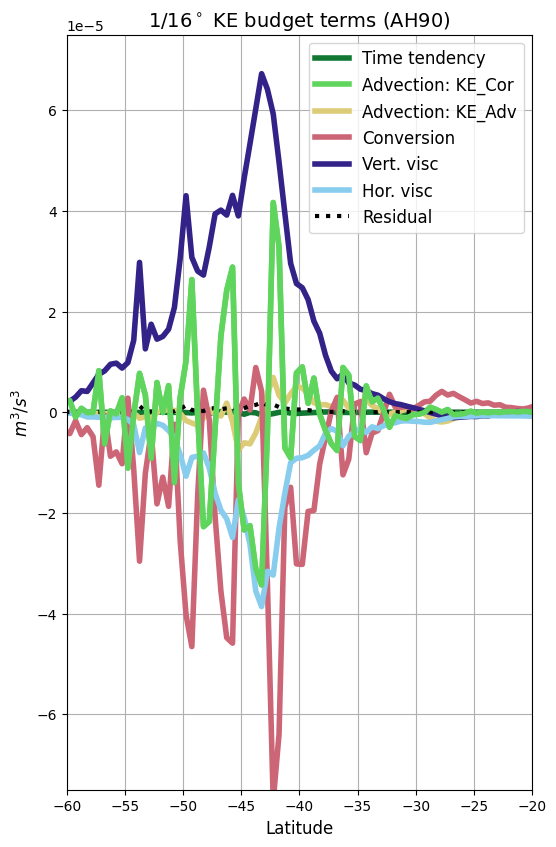

In [64]:
plt.figure(figsize=(6, 10), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh,np.nanmean(KEterm1,axis=1),'-',c='#117733',linewidth=4)
plt.plot(yh,np.nanmean(KEterm2-KEterm2_alternate,axis=1),'-',c='#60D55D',linewidth=4)
plt.plot(yh,np.nanmean(KEterm2_alternate,axis=1),'-',c='#ddcc77',linewidth=4)
plt.plot(yh,np.nanmean(KEterm3+KEterm4,axis=1),'-',c='#cc6677',linewidth=4)
plt.plot(yh,np.nanmean(KEterm5,axis=1),'-',c='#332288',linewidth=4)
plt.plot(yh,np.nanmean(KEterm6,axis=1),'-',c='#88ccee',linewidth=4)
plt.plot(yh,np.nanmean(E,axis=1),':',c='k',linewidth=3)

plt.plot(yh,np.nanmean(KEterm2-KEterm2_alternate,axis=1),'-',c='#60D55D',linewidth=4)




plt.grid()
plt.legend(['Time tendency','Advection: KE_Cor','Advection: KE_Adv','Conversion','Vert. visc','Hor. visc','Residual'],loc='upper right',fontsize=12)
plt.plot([0, 0],[-100, 100],'--',color=[0,0,0])
plt.xlim(-60, -20)
plt.ylim(-.75e-4,.75e-4);
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('$m^3/s^3$',fontsize=12)
plt.title('1/16$^\circ$ KE budget terms (AH90)',fontsize=14)

Text(0.5, 1.0, '1/16$^\\circ$ KE budget terms (Sadourny)')

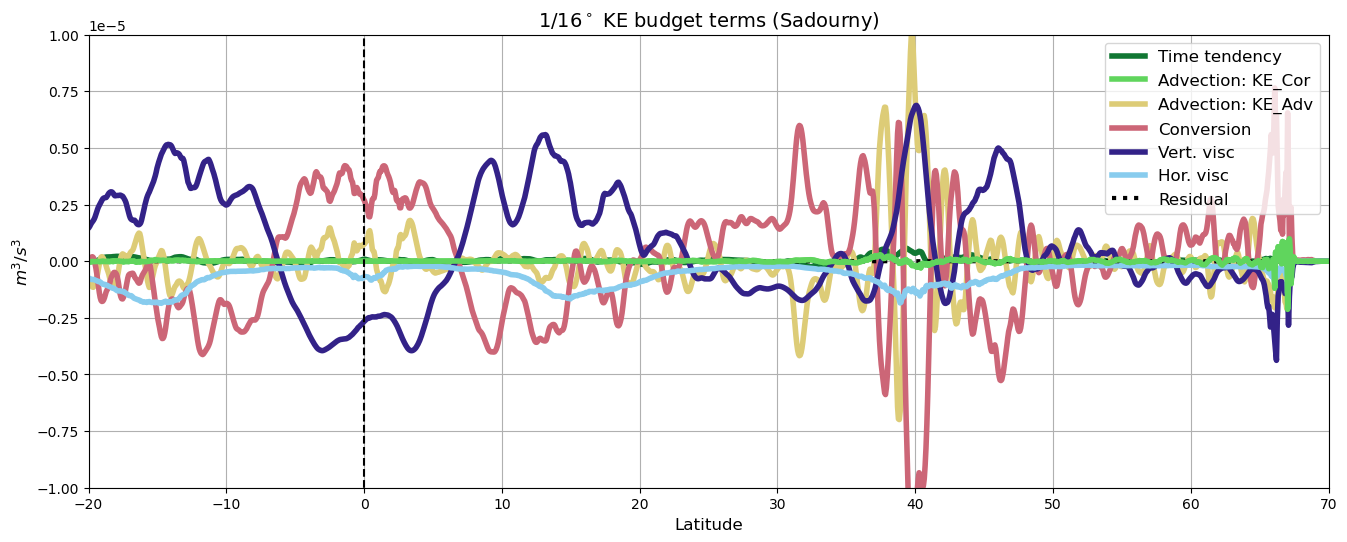

In [10]:
plt.figure(figsize=(16, 6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh,np.nanmean(KEterm1,axis=1),'-',c='#117733',linewidth=4)
plt.plot(yh,np.nanmean(KEterm2-KEterm2_alternate,axis=1),'-',c='#60D55D',linewidth=4)
plt.plot(yh,np.nanmean(KEterm2_alternate,axis=1),'-',c='#ddcc77',linewidth=4)
plt.plot(yh,np.nanmean(KEterm3+KEterm4,axis=1),'-',c='#cc6677',linewidth=4)
plt.plot(yh,np.nanmean(KEterm5,axis=1),'-',c='#332288',linewidth=4)
plt.plot(yh,np.nanmean(KEterm6,axis=1),'-',c='#88ccee',linewidth=4)
plt.plot(yh,np.nanmean(E,axis=1),':',c='k',linewidth=3)

plt.plot(yh,np.nanmean(KEterm2-KEterm2_alternate,axis=1),'-',c='#60D55D',linewidth=4)




plt.grid()
plt.legend(['Time tendency','Advection: KE_Cor','Advection: KE_Adv','Conversion','Vert. visc','Hor. visc','Residual'],loc='upper right',fontsize=12)
plt.plot([0, 0],[-100, 100],'--',color=[0,0,0])
plt.xlim(-20, 70)
plt.ylim(-1e-5,1e-5);
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('$m^3/s^3$',fontsize=12)
plt.title('1/16$^\circ$ KE budget terms (Sadourny)',fontsize=14)

In [88]:
#For meridional slices:


lon_slice = 60 #For 15 degrees East 1/4 of domain, for 1/16 deg the index is 240; for 1/4 it's 60
KEterm1_slice = (np.array(av['dKE_dt'][:,:,:,lon_slice]))
KEterm2_slice = (np.array(av['KE_CorAdv'][:,:,:,lon_slice]))
KEterm3_slice = (np.array(av['PE_to_KE'][:,:,:,lon_slice]))
KEterm4_slice = (np.array(av['KE_BT'][:,:,:,lon_slice]))
KEterm5_slice = (np.array(av['KE_visc'][:,:,:,lon_slice]))
KEterm6_slice = (np.array(av['KE_horvisc'][:,:,:,lon_slice]))


KEterm1_slice = np.nanmean(KEterm1_slice,axis=0);
KEterm2_slice = np.nanmean(KEterm2_slice,axis=0);
KEterm3_slice = np.nanmean(KEterm3_slice,axis=0);
KEterm4_slice = np.nanmean(KEterm4_slice,axis=0);
KEterm5_slice = np.nanmean(KEterm5_slice,axis=0);
KEterm6_slice = np.nanmean(KEterm6_slice,axis=0);

E_slice = KEterm1_slice-KEterm2_slice-KEterm3_slice-KEterm4_slice-KEterm5_slice-KEterm6_slice

h  = np.nanmean(np.array(av['h'][:,:,:,lon_slice]),axis=0); h[np.isnan(h)]=0.0
interface = np.zeros([16,h.shape[1]]);
interface.shape
for i in range(0,len(Layer)):
    print(i)
    interface[i,:]=np.nansum(h[i:,:],axis=0)-depth[:,lon_slice] #negative down
interface[15,:]=-depth[:,lon_slice]
#interface is negative down, interface_ref_mat is positive down


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


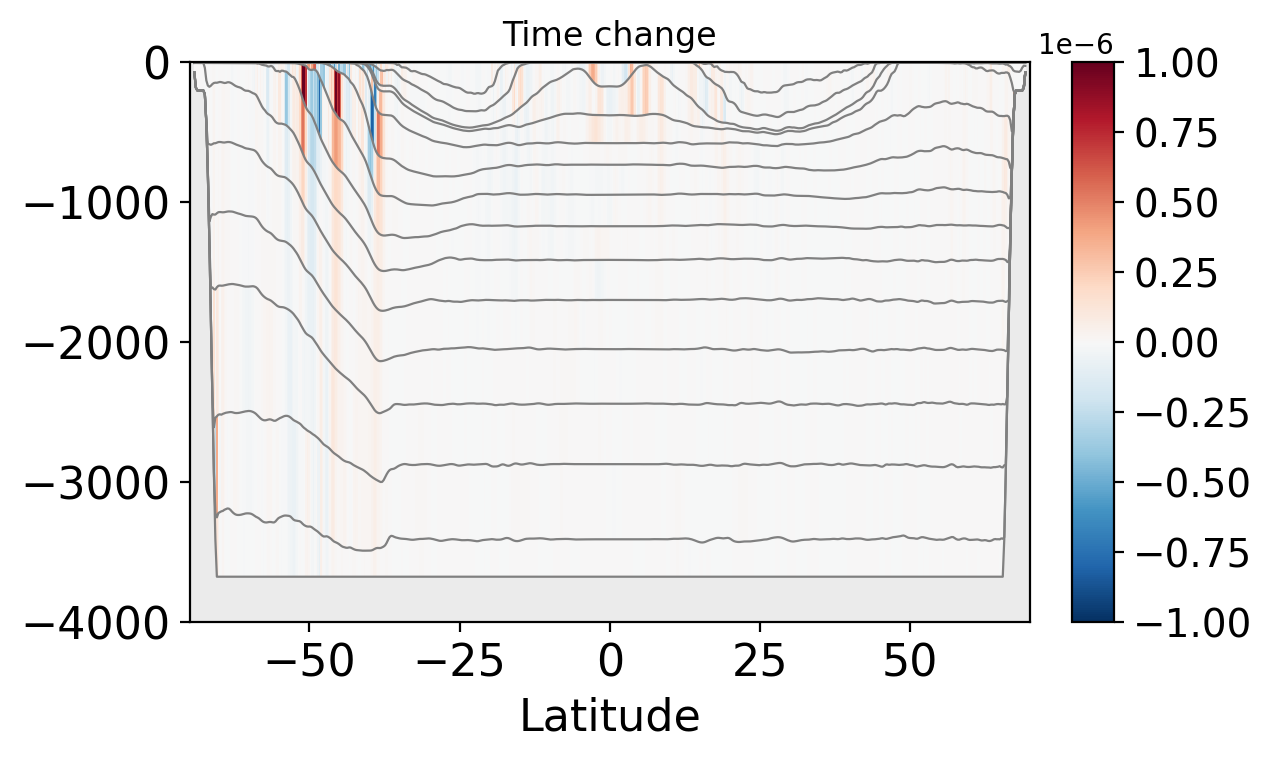

In [89]:
fig = plt.figure(figsize=(7, 4), dpi= 200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Latitude',fontsize=16)
#ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); 
 
ax2.tick_params(labelsize=12)
ax1.set_ylim([-4000,0])
ax1.set_title('Time change')
plotted =ax1.pcolor(yh,interface,np.array(KEterm1_slice),norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-1e-6,vmax=1e-6)
for i in range(0,len(Layer)+1):
    line,=ax1.plot(yh,interface[i,:],color=[.5,.5,.5],linewidth=.8) #Plot the individual layer positions, don't do this for alongshore average
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
plt.show()

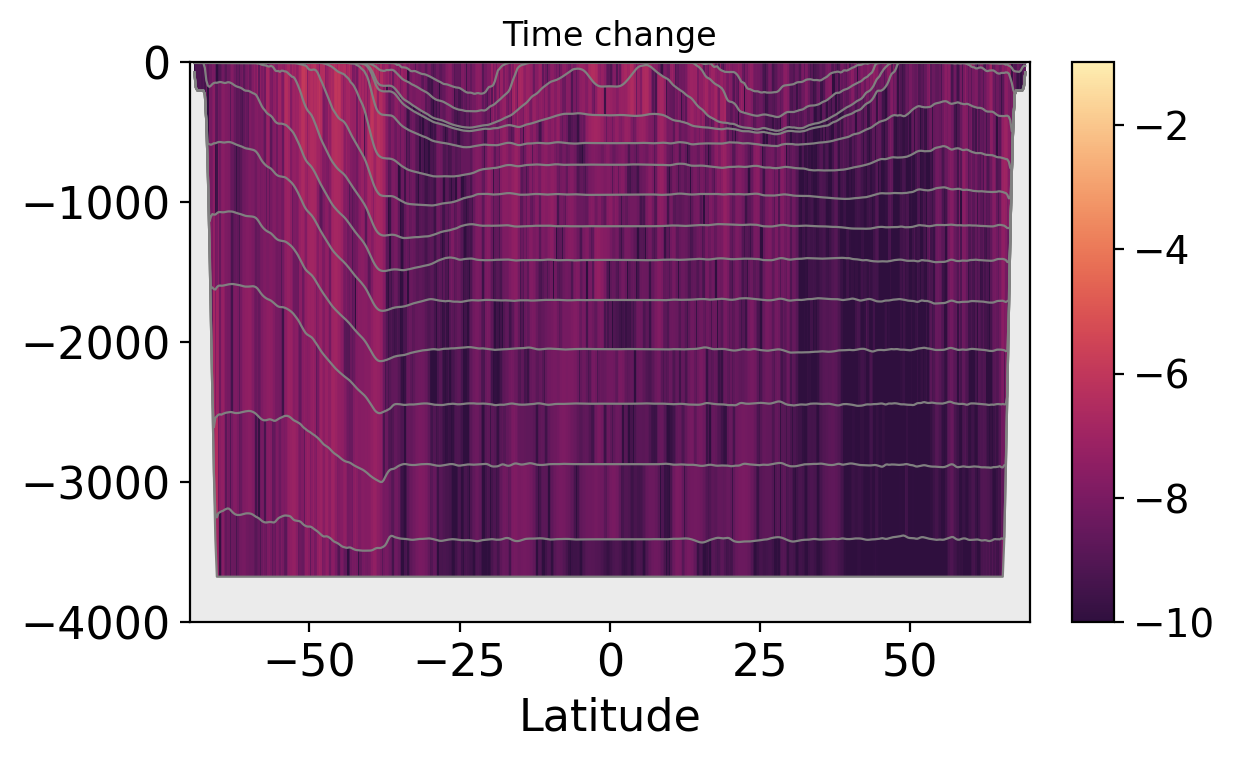

In [61]:
fig = plt.figure(figsize=(7, 4), dpi= 200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Latitude',fontsize=16)
#ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); 
 
ax2.tick_params(labelsize=12)
ax1.set_ylim([-4000,0])
ax1.set_title('Time change')
plotted =ax1.pcolor(yh,interface,np.log10(np.abs(KEterm1_slice)),cmap=cmocean.cm.matter_r,vmin=-10,vmax=-1)
for i in range(0,len(Layer)+1):
    line,=ax1.plot(yh,interface[i,:],color=[.5,.5,.5],linewidth=.8) #Plot the individual layer positions, don't do this for alongshore average
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
plt.show()

In [6]:
KEterm1 = (np.array(av['dKE_dt'][-1,:,:,:]))
KEterm1.shape

#assuming all of these are on the RHS of the KE equation

(15, 560, 240)

In [56]:
print(sum(sum(area_t)))
np.nansum(area_t)

80059671616113.67


80059671616113.4

In [85]:
#For entire water column:
KEterm1 = np.nansum((av['dKE_dt'][-1,:,:,:]),axis=0)
#assuming all of these are on the RHS of the KE equation
KEterm2 = np.nansum((av['KE_adv'][-1,:,:,:]),axis=0)
KEterm3 = np.nansum((av['PE_to_KE'][-1,:,:,:]),axis=0)
KEterm4 = np.nansum((av['KE_BT'][-1,:,:,:]),axis=0)
KEterm5 = np.nansum((av['KE_visc'][-1,:,:,:]),axis=0)
KEterm6 = np.nansum((av['KE_horvisc'][-1,:,:,:]),axis=0)


# KEterm1 = np.nanmean(KEterm1,axis=0);
# KEterm2 = np.nanmean(KEterm2,axis=0);
# KEterm3 = np.nanmean(KEterm3,axis=0);
# KEterm4 = np.nanmean(KEterm4,axis=0);
# KEterm5 = np.nanmean(KEterm5,axis=0);
# KEterm6 = np.nanmean(KEterm6,axis=0);

E = KEterm1-KEterm2-KEterm3-KEterm4-KEterm5-KEterm6 #residual term between dKE/dt and RHS of equation

print(KEterm1.shape,E.shape)

(560, 240) (560, 240)


In [24]:
print('time change:',np.nansum(KEterm1*area_t)/np.nansum(area_t),'\n',
      'advection (KE_CorAdv):',np.nansum(KEterm2*area_t)/np.nansum(area_t),'\n',
      'advection (KE_adv):',np.nansum(KEterm2_alternate*area_t)/np.nansum(area_t),'\n',
      'conversion',np.nansum((KEterm3+KEterm4)*area_t)/np.nansum(area_t),'\n',
      'vert visc:',np.nansum(KEterm5*area_t)/np.nansum(area_t),'\n',
      'hor visc:',np.nansum(KEterm6*area_t)/np.nansum(area_t),'\n',
      'error using KE_CorAdv:',np.nansum(E*area_t)/np.nansum(area_t),'\n',
      'error using KE_adv:',np.nansum(E_alternate*area_t)/np.nansum(area_t),"%.2f")

time change: 1.1143349160569963e-09 
 advection: -3.4967135262521187e-07 
 advection alt: -1.0568589181607481e-09 
 conversion 5.317077646955128e-08 
 vert visc: 4.104746497097298e-06 
 hor visc: -3.8071316144847807e-06 
 error: 3.1287838500908187e-14


In [52]:
print('time change:',np.nansum(KEterm1),'\n',
      'advection:',np.nansum(KEterm2),'\n',
      'conversion',np.nansum((KEterm3+KEterm4)),'\n',
      'vert visc:',np.nansum(KEterm5),'\n',
      'hor visc:',np.nansum(KEterm6),'\n',
      'error:',np.nansum(E))

time change: -0.023258753 
 advection: -0.04838974 
 conversion -0.0159964 
 vert visc: 0.562848 
 hor visc: -0.5217207 
 error: 3.2366134e-09


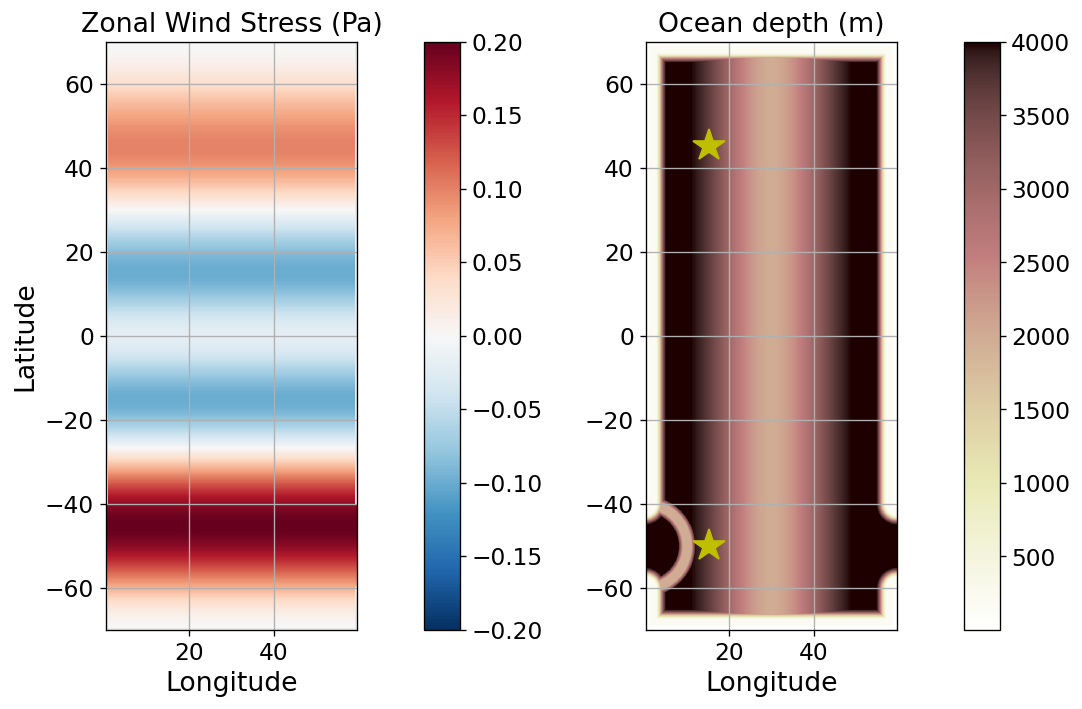

In [9]:
#Plotting zonal wind forcing (taux)
taux= forcing.taux.values[0,:,:]; taux=(taux[:,1:]+taux[:,:-1])/2.
fig = plt.figure(figsize=(10, 7), dpi=120, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.3,0.7]) #left, bottom, width, height
ax2 = fig.add_axes([.46, 0.2, 0.03, 0.7])

ax3 = fig.add_axes([0.6,0.2,0.3,0.7])
ax4 = fig.add_axes([.91, 0.2, 0.03, 0.7])

ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('Zonal Wind Stress (Pa)',fontsize=16)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=14); 
ax2.tick_params(labelsize=14)

plotted =ax1.pcolor(xh,yh,taux,cmap='RdBu_r',vmin=-0.2,vmax=0.2)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plotted =ax3.pcolor(xh,yh,depth,cmap='pink_r')
ax3.plot(xh[240],yh[1840],'*',Markersize=20,color='y')
ax3.plot(xh[240],yh[320],'*',Markersize=20,color='y')
ax3.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax4, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
ax3.set_title('Ocean depth (m)',fontsize=16)
ax3.set_xlabel('Longitude',fontsize=16)

ax3.tick_params(labelsize=14); 
ax4.tick_params(labelsize=14)
ax1.grid('on')
ax3.grid('on')
plt.show()
#fig.savefig('taux.png')

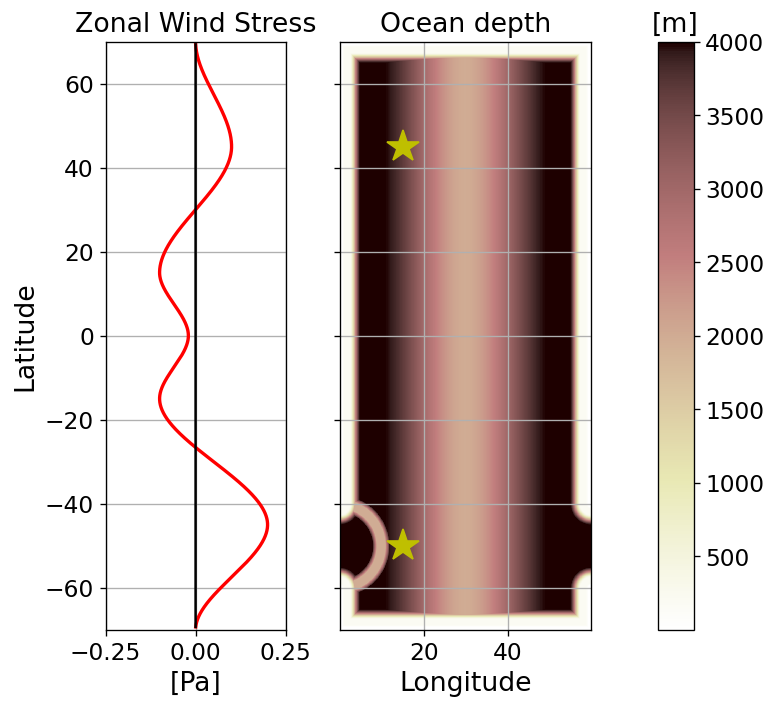

In [35]:
#Plotting zonal wind forcing (taux)
taux= forcing.taux.values[0,:,:]; taux=(taux[:,1:]+taux[:,:-1])/2.
fig = plt.figure(figsize=(10, 7), dpi=120, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.15,0.7]) #left, bottom, width, height
#ax2 = fig.add_axes([.46, 0.2, 0.03, 0.7])

ax3 = fig.add_axes([0.3,0.2,0.3,0.7])
ax4 = fig.add_axes([.61, 0.2, 0.03, 0.7])

ax1.set_title('Zonal Wind Stress',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.set_xlabel('[Pa]',fontsize=16)

ax1.tick_params(labelsize=14); 
ax1.set_xlim([-0.25,.25])
ax1.set_ylim([-70,70])
plotted =ax1.plot(taux[:,100],yh,'r',linewidth=2)
plotted =ax1.plot(taux[:,100]*0,yh,'k')



#
plotted =ax3.pcolor(xh,yh,depth,cmap='pink_r')
ax3.plot(xh[240],yh[1840],'*',Markersize=20,color='y')
ax3.plot(xh[240],yh[320],'*',Markersize=20,color='y')
ax3.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax4, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
ax3.set_title('Ocean depth',fontsize=16)
ax4.set_title('[m]',fontsize=16)
ax3.set_xlabel('Longitude',fontsize=16)
ax3.axes.yaxis.set_ticklabels([])

ax3.set_ylim([-70,70])
ax3.tick_params(labelsize=14); 
ax4.tick_params(labelsize=14)
ax1.grid('on')
ax3.grid('on')
plt.show()
#fig.savefig('taux.png')

(960,)

In [23]:
yh.shape

(2240,)

In [ ]:
#Picking out boxes to plot KE budgets for. Will plot area sum of weighted time-mean over 500 days after summing vertically
#Boxes with indexes shown for 1/4 degree:
#A: 40 to 50 lat (440:480); 15 to 45 lon (60:180)
#B: 20 to 40 lat (360:440); 15 to 45 lon (60:180)
#C: -60 to -30 lat (40:160); 15 to 45 lon (60:180)


In [105]:
#Isolating boxes

boxlat = np.arange(1760,1920)
boxlon = np.arange(240,720)

KEterm1 = np.nansum(np.array(av['dKE_dt'][:,:,boxlat,boxlon]),axis=1)
#assuming all of these are on the RHS of the KE equation
KEterm2 = np.nansum(np.array(av['KE_CorAdv'][:,:,boxlat,boxlon]),axis=1)
KEterm3 = np.nansum(np.array(av['PE_to_KE'][:,:,boxlat,boxlon]),axis=1)
KEterm4 = np.nansum(np.array(av['KE_BT'][:,:,boxlat,boxlon]),axis=1)
KEterm5 = np.nansum(np.array(av['KE_visc'][:,:,boxlat,boxlon]),axis=1)
KEterm6 = np.nansum(np.array(av['KE_horvisc'][:,:,boxlat,boxlon]),axis=1)


KEterm1 = np.nanmean(KEterm1,axis=0);
KEterm2 = np.nanmean(KEterm2,axis=0);
KEterm3 = np.nanmean(KEterm3,axis=0);
KEterm4 = np.nanmean(KEterm4,axis=0);
KEterm5 = np.nanmean(KEterm5,axis=0);
KEterm6 = np.nanmean(KEterm6,axis=0);

E = KEterm1-KEterm2-KEterm3-KEterm4-KEterm5-KEterm6 #residual term between dKE/dt and RHS of equation
area_box = area_t[np.ix_(boxlat,boxlon)]
print(KEterm1.shape,area_box.shape)

(160, 480) (160, 480)


In [106]:
boxterm1 = np.nansum(KEterm1*area_box/np.nansum(area_box))
boxterm2 = np.nansum(KEterm2*area_box/np.nansum(area_box))
boxterm34= np.nansum((KEterm3+KEterm4)*area_box/np.nansum(area_box))
boxterm5 = np.nansum(KEterm5*area_box/np.nansum(area_box))
boxterm6 = np.nansum(KEterm6*area_box/np.nansum(area_box))
boxerror = np.nansum(E*area_box/np.nansum(area_box))

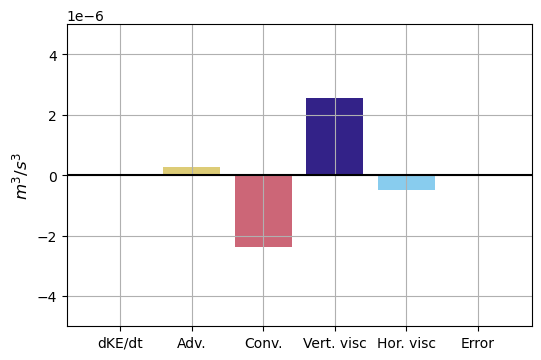

In [107]:
#plt.figure(figsize=(16, 6), dpi= 100, facecolor='w', edgecolor='k')


fig, ax1 = plt.subplots(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')

# plt.grid()
# plt.legend(['Time tendency','Advection','Conversion','Vert. visc','Hor. visc','Residual'],loc='upper right',fontsize=12)
# plt.plot([0, 0],[-100, 100],'--',color=[0,0,0])
# plt.xlim(-20, 70)
# plt.ylim(-1e-5,1e-5);
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# plt.xlabel('Latitude',fontsize=12)
plt.ylabel('$m^3/s^3$',fontsize=12)
# plt.title('1/4$^\circ$ KE budget terms',fontsize=14)




# create a dataset
height = [boxterm1, boxterm2, boxterm34, boxterm5, boxterm6, boxerror]
bars = ('dKE/dt', 'Adv.', 'Conv.', 'Vert. visc', 'Hor. visc', 'Error')
x_pos = np.arange(len(bars))

# Create bars with different colors
ax1.plot([-1,6],[0,0], 'k')
ax1.bar(x_pos, height, color = ['#117733','#ddcc77','#cc6677','#332288','#88ccee','k'])

ax1.plot([])
ax1.set_xlim([-0.75,5.75])
ax1.set_ylim([-5e-6,5e-6])

# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.grid('on')
# Show graph
plt.show()

In [65]:

# TO WRITE AND READ e_calculated:

#%rm e_calculated.nc
# written_ds = nc.Dataset('e_calculated.nc', 'w', format='NETCDF4')

# timef = written_ds.createDimension('timef', 100)
# latf = written_ds.createDimension('latf',len(yh) )
# lonf = written_ds.createDimension('lonf', len(xh))
# layerf = written_ds.createDimension('layerf', 15)

# e = written_ds.createVariable('e', 'f4', ('timef', 'layerf', 'latf', 'lonf',))

# e[:,:, :, :] = e_calculated
# written_ds.close()
# reading_e = xr.open_dataset('test.nc')
# print(reading_e)
# e_calculated = reading_e['e']

#np.nanmean(e_calculated)
#e2 and e2_calculated are roughly the same, just e2_calculated using 5-day averaged h outputs. 